Here is a problem I have come across recently:

Given a list of SMILES is there a tool or way of recognising which functional groups each SMILES has ?

Here is the list of functional groups that I would like to examine:

- Acid (carboxylate)
- Alcohol
- Alkene
- Anhydride
- Amide
- 1y Amide
- 2y Amide
- 3y Amide
- Amine
- 1y Amine
- 2y Amine
- 3y Amine
- Heteroaromatic Amines
- Anilines
- Nitrogen Bases
- Aromatic
- Carbonate
- Ester
- Ether
- Ketone/Aldehyde
- Halogen
- Chloro
- Fluoro
- Hydrocarbon
- Nitrile
- Nitro
- Phosphorus Containing
- Sulfur Containing
- Sulfide
- Sulfoxide
- Sulfite
- Sulfone
- Urea
- Silicone
- Other

[RDKit](www.rdkit.org) offers some of this functionality through its [rdkit.Chem.Fragments module](https://rdkit.org/docs/source/rdkit.Chem.Fragments.html#module-rdkit.Chem.Fragments). Although covering enough groups from the above collection, this is not a comprehensive list.

As always, if something is not available, I like to have a go at building it my self.

I ended up defning 37 functions - one for each of the above groups (and a couple more). I was only interested in whether a functional group is present or not, and not how many times a group might be present as well. As the code for each functional group filter is long, I will first demo the use, and provide the code at the [end](#Functional_Groups_Functions). 

I hope you find this functionality useful and sensible. If you spot any errors or improvements, please contact me.

First let's import the required modules:

In [1]:
# pandas and numpy are always a must
import pandas as pd
import numpy as np

# rdkit for sensible cheminformatics
from rdkit import Chem
from rdkit.Chem import Fragments

Let's define a function that will be taking a pandas dataframe with a column containing SMILES and returning a table (dataframe) with functional group names (as columns) and whether each row entry has that functional group:

In [2]:
def ApplyFGroupsFunctions(data, smiles_col = 'SMILES'):

    ''' Takes a dataframe with a 'SMILES' column and returns a new dataframe
        with functional groups columns containing 'Y' or 'N' values. '''

    fgroup_cols =  {"Alcohol": [AlcoholGroup(smi) for smi in data[smiles_col]],
                    "Alkene": [AlkeneGroup(smi) for smi in data[smiles_col]],
                    "Alkyne": [AlkyneGroup(smi) for smi in data[smiles_col]],
                    "Anhydride": [AnhydrideGroup(smi) for smi in data[smiles_col]],
                    "Aromatic": [AromaticGroup(smi) for smi in data[smiles_col]],
                    "Amide": [AmideGroup(smi)  for smi in data[smiles_col]],
                    "Amine": [AmineGroup(smi) for smi in data[smiles_col]],
                    "Aniline": [AnilineGroup(smi) for smi in data[smiles_col]],
                    "BasicN": [BasicNGroup(smi) for smi in data[smiles_col]],
                    "Bromo": [BromoGroup(smi) for smi in data[smiles_col]],
                    "Carbonyl": [CarbonylGroup(smi) for smi in data[smiles_col]],
                    "Carbonate": [CarbonateGroup(smi) for smi in data[smiles_col]],
                    "Chloro": [ChloroGroup(smi) for smi in data[smiles_col]],
                    "Ester": [EsterGroup(smi) for smi in data[smiles_col]],
                    "Ether": [EtherGroup(smi) for smi in data[smiles_col]],
                    "Fluoro": [FluoroGroup(smi) for smi in data[smiles_col]],
                    "Halogen": [HalogenGroup(smi) for smi in data[smiles_col]],
                    "HetArAmine": [HetArAmineGroup(smi) for smi in data[smiles_col]],
                    "Hydrocarbon": [HydrocarbonGroup(smi) for smi in data[smiles_col]],
                    "Iodo": [IodoGroup(smi) for smi in data[smiles_col]],
                    "Ketone/Aldehude": [KetAlGroup(smi) for smi in data[smiles_col]],
                    "Nitrile": [NitrileGroup(smi) for smi in data[smiles_col]],
                    "Nitro": [NitroGroup(smi) for smi in data[smiles_col]],
                    "Phosporus": [PhosporusGroup(smi) for smi in data[smiles_col]],
                    "PrimaryAmide": [PrimaryAmideGroup(smi) for smi in data[smiles_col]],
                    "PrimaryAmine": [PrimaryAmineGroup(smi) for smi in data[smiles_col]],
                    "SecAmine": [SecAmineGroup(smi) for smi in data[smiles_col]],
                    "SecAmide": [SecAmideGroup (smi) for smi in data[smiles_col]],
                    "Silicone": [SiliconeGroup(smi) for smi in data[smiles_col]],
                    "Sulfide": [SulfideGroup(smi) for smi in data[smiles_col]],
                    "Sulfone": [SulfoneGroup(smi) for smi in data[smiles_col]],
                    "Sulfur": [SulfurGroup(smi) for smi in data[smiles_col]],
                    "Sulfite": [SulfiteGroup(smi) for smi in data[smiles_col]],
                    "Sulfoxide": [SulfoxideGroup(smi) for smi in data[smiles_col]],
                    "TertAmine": [TertAmineGroup(smi) for smi in data[smiles_col]],
                    "TertAmide": [TertAmideGroup(smi) for smi in data[smiles_col]],
                    "Urea": [UreaGroup(smi) for smi in data[smiles_col]]}
    
    new_cols = pd.DataFrame(fgroup_cols)

    return new_cols

Now let's define a dataframe with a few molecules to test the above:

In [3]:
smiles = ['CC(C)=O', 'CC(=O)N(C)C', 'CC#N', 'CC(=O)OCC', 
 'CC(=O)OCC', 'C(=O)(OC(C)C)OC', 'C(=O)(NC)NC', 
 'O1CCN(C)CC1', 'C1=CC=CC2=C1C=CN=C2', 'C1=CC=CC2=C1C(=O)OC2=O',
 'C1=CC=C(C4=C1C2CC(C)(N(C(N2C)=O)CCCC3=CC=C(C=C3)OC)O4)F', 
 'C1C(C(N1C2=CC=C(C(=C2)C(F)(F)F)C#N)=O)C(C)=O',
 'CN1C[C@@H](C=C2[C@H]1CC3=CNC4=CC=CC2=C34)C(=O)O', 'CN(C)CCC1=CNC2=C1C(=CC=C2)OP(=O)(O)O']

names = ['Acetone', 'DMF', 'Acetonitrile', 'Ethyl Acetate', 
 'Isopropyl Acetate', 'Methyl Isopropyl Carbonate', 'Bis(Methyl) Urea',
 'N-Methyl Morpholine', 'Isoquinoline', 'Aromatic Anhydride', 
 'Chromopynone Analogue', 'Lactam', 'Lysergic acid', 'Psylocybin']

In [4]:
data = pd.DataFrame(zip(names, smiles), columns = ['Names', 'SMILES'])

In [5]:
data

,Names,SMILES
0,Acetone,CC(C)=O
1,DMF,CC(=O)N(C)C
2,Acetonitrile,CC#N
3,Ethyl Acetate,CC(=O)OCC
4,Isopropyl Acetate,CC(=O)OCC
5,Methyl Isopropyl Carbonate,C(=O)(OC(C)C)OC
6,Bis(Methyl) Urea,C(=O)(NC)NC
7,N-Methyl Morpholine,O1CCN(C)CC1
8,Isoquinoline,C1=CC=CC2=C1C=CN=C2
9,Aromatic Anhydride,C1=CC=CC2=C1C(=O)OC2=O


In [8]:
new_cols = ApplyFGroupsFunctions(data)

#stitch the data together
data = pd.concat([data, new_cols], axis=1)

#check that it worked
data.head()

,Names,SMILES,Alcohol,Alkene,Alkyne,Anhydride,Aromatic,Amide,Amine,Aniline,...,SecAmide,Silicone,Sulfide,Sulfone,Sulfur,Sulfite,Sulfoxide,TertAmine,TertAmide,Urea
0,Acetone,CC(C)=O,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
1,DMF,CC(=O)N(C)C,N,N,N,N,N,Y,N,N,...,N,N,N,N,N,N,N,Y,Y,N
2,Acetonitrile,CC#N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,Y,N,N
3,Ethyl Acetate,CC(=O)OCC,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
4,Isopropyl Acetate,CC(=O)OCC,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N


That is lovely!

Let's see if we can use it to slice the data appropriately:

In [9]:
mask = data['Aromatic'] == 'Y'

selected = data[mask]

selected

,Names,SMILES,Alcohol,Alkene,Alkyne,Anhydride,Aromatic,Amide,Amine,Aniline,...,SecAmide,Silicone,Sulfide,Sulfone,Sulfur,Sulfite,Sulfoxide,TertAmine,TertAmide,Urea
8,Isoquinoline,C1=CC=CC2=C1C=CN=C2,N,N,N,N,Y,N,Y,N,...,N,N,N,N,N,N,N,Y,N,N
9,Aromatic Anhydride,C1=CC=CC2=C1C(=O)OC2=O,N,N,N,Y,Y,N,N,N,...,N,N,N,N,N,N,N,N,N,N
10,Chromopynone Analogue,C1=CC=C(C4=C1C2CC(C)(N(C(N2C)=O)CCCC3=CC=C(C=C...,N,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,Y,Y,Y
11,Lactam,C1C(C(N1C2=CC=C(C(=C2)C(F)(F)F)C#N)=O)C(C)=O,N,N,N,N,Y,Y,N,Y,...,N,N,N,N,N,N,N,Y,N,N
12,Lysergic acid,CN1C[C@@H](C=C2[C@H]1CC3=CNC4=CC=CC2=C34)C(=O)O,N,Y,N,N,Y,N,Y,N,...,N,N,N,N,N,N,N,Y,N,N
13,Psylocybin,CN(C)CCC1=CNC2=C1C(=CC=C2)OP(=O)(O)O,N,N,N,N,Y,N,Y,N,...,N,N,N,N,N,N,N,Y,N,N


Let's check visualise these molecules to show that they have an aromatic group:

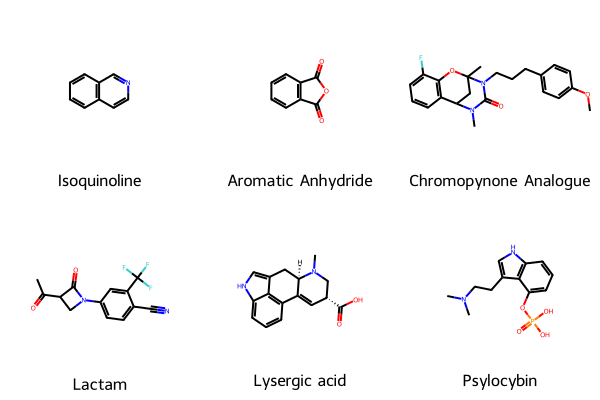

In [10]:
legend = [name for name in selected['Names']]

mols = [Chem.MolFromSmiles(smi) for smi in selected['SMILES']]

img = Chem.Draw.MolsToGridImage(mols=mols, legends=legend)

img

That's nice to see.

I hope you find this functionality useful and sensible. If you spot any errors or improvements, please contact me.

Here is the code for the Functional Group Recognition Functions

#### Functional_Groups_Functions

In [7]:
### --- DEFINE FUNCTIONAL GROUP RECOGNITION FUNCTIONS ---

def AlcoholGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    OH_groups = 0
    
    OH_groups += Chem.Fragments.fr_Al_OH(mol)
    OH_groups += Chem.Fragments.fr_Ar_OH(mol)
    
    if OH_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"    
    

def AmideGroup(smi):

    mol = Chem.MolFromSmiles(smi)
    
    amide_groups = 0
    
    amide_groups += Chem.Fragments.fr_amide(mol)
    
    if amide_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"    
    
def PrimaryAmideGroup(smi):

    mol = Chem.MolFromSmiles(smi)
    
    pri_amide_groups = 0
    
    pri_amide_groups += Chem.Fragments.fr_priamide(mol)
    
    if pri_amide_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"    


def AmineGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    amine_groups = 0
    
    amine_groups += Chem.Fragments.fr_Ar_NH(mol)
    amine_groups += Chem.Fragments.fr_NH2(mol)
    amine_groups += Chem.Fragments.fr_NH1(mol)
    amine_groups += Chem.Fragments.fr_NH0(mol)
    amine_groups -= Chem.Fragments.fr_amide(mol)
    amine_groups -= Chem.Fragments.fr_amide(mol) #not an amide
    amine_groups -= Chem.Fragments.fr_nitrile(mol) #not a nitrile
    amine_groups -= Chem.Fragments.fr_Imine(mol) #not an imine
    
    if amine_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"    
    
def PrimaryAmineGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    pri_amine_groups = 0
    
    pri_amine_groups += Chem.Fragments.fr_NH2(mol)
    
    if pri_amine_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"    
    
def SecAmineGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    sec_amine_groups = 0
    
    sec_amine_groups += Chem.Fragments.fr_NH1(mol)
    
    if sec_amine_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"    

def TertAmineGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    tert_amine_groups = 0
    
    tert_amine_groups += Chem.Fragments.fr_NH0(mol)
    
    if tert_amine_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"   
    

def HetArAmineGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    hetaramine_groups = 0
    
    hetaramine_groups += Chem.Fragments.fr_Ar_N(mol)
    hetaramine_groups += Chem.Fragments.fr_Nhpyrrole(mol)
    hetaramine_groups += Chem.Fragments.fr_imidazole(mol)
    hetaramine_groups += Chem.Fragments.fr_oxazole(mol)
    hetaramine_groups += Chem.Fragments.fr_pyridine(mol)
    hetaramine_groups += Chem.Fragments.fr_tetrazole(mol)
    hetaramine_groups += Chem.Fragments.fr_thiazole(mol)
    #more groups should go here - need to check - e.g. ??
    
    if hetaramine_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"   

def AnilineGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    aniline_groups = 0
    
    aniline_groups += Chem.Fragments.fr_aniline(mol)
    
    if aniline_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
def BasicNGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    basic_n_groups = 0
    
    basic_n_groups += Chem.Fragments.fr_piperdine(mol)
    basic_n_groups += Chem.Fragments.fr_piperzine(mol)
    basic_n_groups += Chem.Fragments.fr_oxime(mol)
    basic_n_groups += Chem.Fragments.fr_morpholine(mol)
    basic_n_groups += Chem.Fragments.fr_amidine(mol)
    basic_n_groups += Chem.Fragments.fr_Imine(mol)
    basic_n_groups += Chem.Fragments.fr_guanido(mol)
    
    basic_n_groups += int(any([AmineGroup(smi)=="Y", 
                                 PrimaryAmineGroup(smi)=="Y",
                                 SecAmineGroup(smi)=="Y",
                                 TertAmineGroup(smi)=="Y",
                                 HetArAmineGroup(smi)=="Y",
                                 AnilineGroup(smi)=="Y"]))
    
    if basic_n_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
    
def EsterGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    ester_groups = 0
    
    ester_groups += Chem.Fragments.fr_ester(mol) # this also hits anhydrides
    
    anhydride_smarts = '[CX3](=[OX1])[OX2][CX3](=[OX1])'
    
    pattern = Chem.MolFromSmarts(anhydride_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
    
    ester_groups -= 2*len(matches) #remove number of anhydride groups - two esters per anhydride    
    
    if ester_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
def EtherGroup(smi):
    
    ether_smarts = '[OD2]([#6])[#6]' # this also hits esters
    
    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(ether_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
    
    ether_groups = 0    
    ether_groups += len(matches)
    ether_groups -= Chem.Fragments.fr_ester(mol) # not an ester
                        
    if ether_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"
    

def KetAlGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    ketal_groups = 0
    
    ketal_groups += Chem.Fragments.fr_ketone_Topliss(mol)
    ketal_groups += Chem.Fragments.fr_ketone(mol)
    ketal_groups += Chem.Fragments.fr_aldehyde(mol)
    
    if ketal_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
    
def CarbonylGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    co_groups = 0
    
    co_groups += Chem.Fragments.fr_C_O_noCOO(mol)
    
    if co_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
def HalogenGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    halogen_groups = 0
    
    halogen_groups += Chem.Fragments.fr_alkyl_halide(mol)
    halogen_groups += Chem.Fragments.fr_halogen(mol)
    
    if halogen_groups > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
def ChloroGroup(smi):
    
    if 'Cl' in smi:
        
        return "Y"
    
    else:
        
        return "N"
    
def BromoGroup(smi):
    
    if 'Br' in smi:
        
        return "Y"
    
    else:
        
        return "N"
    
def FluoroGroup(smi):
    
    if 'F' in smi:
        
        return "Y"
    
    else:
        
        return "N"
    
def IodoGroup(smi):
    
    if 'I' in smi:
        
        return "Y"
    
    else:
        
        return "N"

def SiliconeGroup(smi):
    
    if 'Si'in smi:
        
        return "Y"
    
    else:
        
        return "N"

    
def PhosporusGroup(smi):
    
    if 'P' in smi:
        
        return "Y"
    
    else:
        
        return "N"  
    
def SulfurGroup(smi):
    
    if (('S' in smi) and ('Si' not in smi)):
        
        return "Y"
    
    else:
        
        return "N"  
    
def HydrocarbonGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    hydrocarb = 0 
    
    hydrocarb += Chem.Fragments.fr_unbrch_alkane(mol)
    
    if hydrocarb > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
def NitrileGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    nitrile = 0 
    
    nitrile += Chem.Fragments.fr_nitrile(mol)
    
    if nitrile > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
    
def NitroGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    nitro = 0 
    
    nitro += Chem.Fragments.fr_nitro(mol)
    
    if nitro > 0:
        
        return "Y"
    
    else:
        
        return "N"

def SulfideGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    sulfide = 0 
    
    sulfide += Chem.Fragments.fr_sulfide(mol)
    
    if sulfide > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
def SulfoneGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    sulfone = 0 
    
    sulfone += Chem.Fragments.fr_sulfone(mol)
    
    if sulfone > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
def UreaGroup(smi):
    
    mol = Chem.MolFromSmiles(smi)
    
    urea = 0 
    
    urea += Chem.Fragments.fr_urea(mol)
    
    if urea > 0:
        
        return "Y"
    
    else:
        
        return "N"
    
#define new functions that use SMARTS

def AlkeneGroup(smi):
    
    alkene_smarts = 'C=C'
    
    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(alkene_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
                        
    if len(matches) > 0:
        
        return 'Y'
    
    else:
        
        return 'N'
    
def AlkyneGroup(smi):
    
    alkyne_smarts = '[CX2]#[CX2]'
    
    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(alkyne_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
                        
    if len(matches) > 0:
        
        return 'Y'
    
    else:
        
        return 'N'
    
def AnhydrideGroup(smi):
    
    anhydride_smarts = '[CX3](=[OX1])[OX2][CX3](=[OX1])'
    
    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(anhydride_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
                        
    if len(matches) > 0:
        
        return 'Y'
    
    else:
        
        return 'N'


def SecAmideGroup(smi):
    
    sec_amide_smarts = '[CX3][NX3;H1][CX3](=[OX1])[#6]'
    
    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(sec_amide_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
                        
    if len(matches) > 0:
        
        return 'Y'
    
    else:
        
        return 'N'

def TertAmideGroup(smi):
    
    tert_amide_smarts = '[NX3](-[CX4])(-[CX4])-[CX3]=[O]'
    
    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(tert_amide_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
                        
    if len(matches) > 0:
        
        return 'Y'
    
    else:
        
        return 'N'
    

def AromaticGroup(smi):

    '''This is very challenging. My approach is to get the rings, and see if any are aromatic.'''
    
    # To detect aromatic rings, I would loop over the bonds in each ring and
    # flag the ring as aromatic if all bonds are aromatic:
    # https://www.rdkit.org/docs/Cookbook.html#identify-aromatic-rings
    def isRingAromatic(mol, bondRing):
            for id in bondRing:
                if not mol.GetBondWithIdx(id).GetIsAromatic():
                    return False
            return True
    
    mol = Chem.MolFromSmiles(smi)
    
    rings = mol.GetRingInfo()
        
    aromatics = [isRingAromatic(mol, ring) for ring in rings.BondRings()] #returns boolean
    
    if any(aromatics):
        
        return 'Y'
    
    else:
        
        return 'N'    
    

def CarbonateGroup(smi):
    
    carbonate_smarts = '[CX3](=[O])(-[O])-[O]'

    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(carbonate_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
                        
    if len(matches) > 0:
        
        return 'Y'
    
    else:
        
        return 'N'

def SulfoxideGroup(smi):
    
    sulfoxide_smarts = '[S;D3](=[O])(-[C])-[C]'
    
    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(sulfoxide_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
                        
    if len(matches) > 0:
        
        return 'Y'
    
    else:
        
        return 'N'

def SulfiteGroup(smi):
    
    sulfite_smarts = '[S;D2](-[C])-[C]'
    
    mol = Chem.MolFromSmiles(smi)
    
    pattern = Chem.MolFromSmarts(sulfite_smarts)
    
    matches = mol.GetSubstructMatches(pattern)
                        
    if len(matches) > 0:
        
        return 'Y'
    
    else:
        
        return 'N'